In [1]:
import keras
import seaborn as sns

sns.set_style('whitegrid')

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [3]:
import matplotlib.pyplot as plt

AttributeError: 'Figure' object has no attribute 'sublots_adjust'

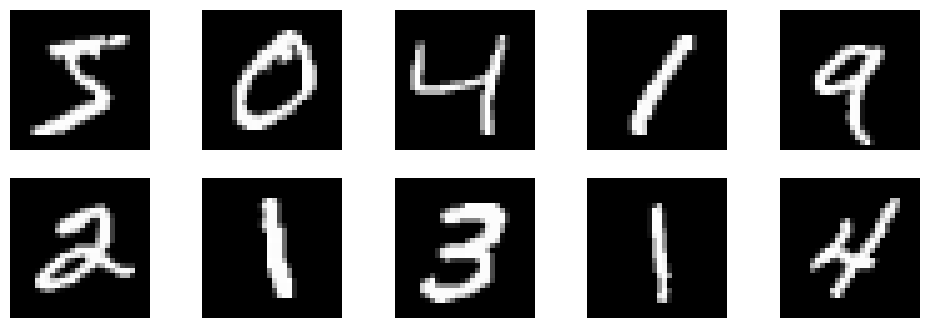

In [5]:
def display_images(data, nrows=2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap='gray') # imshow is the function to display images
        ax.axis('off')

    fig.sublots_adjust(bottom=0.0, hspace=1, wspace=0)
    

display_images (X_train)

In [31]:
from keras import layers, models

def make_model(nodes = None, names = [], activations = [], optimizer = 'Adam'):
    model = keras.Sequential(name = 'MLP')
    model.add(layers.Flatten(input_shape=(28, 28), name = "Input"))
    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name = name, activation=activation))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
    # sparse_categorical_crossentropy is used for multiple classification
    # categorical_crossentropy is used for binary classification
    return model

In [32]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_naive = make_model(nodes = [10], names = ['Output'], activations = ['softmax'], optimizer=optimizer)
model_naive.summary()

d:\TeachMe\DATA Sci\IT Högsk\GitHub\Machine_Learning-Mary-Kavalionak\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_naive.fit(X_train, y_train, epochs=20, validation_split=1/6, verbose = 1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7426 - loss: 22.1122 - val_accuracy: 0.8736 - val_loss: 6.6092
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8739 - loss: 6.1614 - val_accuracy: 0.8803 - val_loss: 5.9901
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8838 - loss: 5.7013 - val_accuracy: 0.9008 - val_loss: 5.1902
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8847 - loss: 5.4383 - val_accuracy: 0.8957 - val_loss: 5.1593
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8876 - loss: 5.3309 - val_accuracy: 0.8895 - val_loss: 5.4843
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 5.1795 - val_accuracy: 0.8948 - val_loss: 5.0597
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8876 - loss: 4.9628 - val_accuracy: 0.8923 - val_loss: 5.4171
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8867 - loss: 5.1877 -

In [19]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.index = range(len(naive_history))

naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.82876,10.864614,0.8736,6.609247
1,0.87464,6.202377,0.8803,5.990062
2,0.88154,5.756602,0.9008,5.190212
3,0.88314,5.495794,0.8957,5.159341
4,0.88540,5.475620,0.8895,5.484298


In [24]:
def plot_metrics(df_history, style = '-o'):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [['loss', 'val_loss'], ['accuracy', 'val_accuracy']]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y = metric, xlabel = 'Epoch', ylabel = metric[0], title = metric[0], style = style, ax = ax)
        

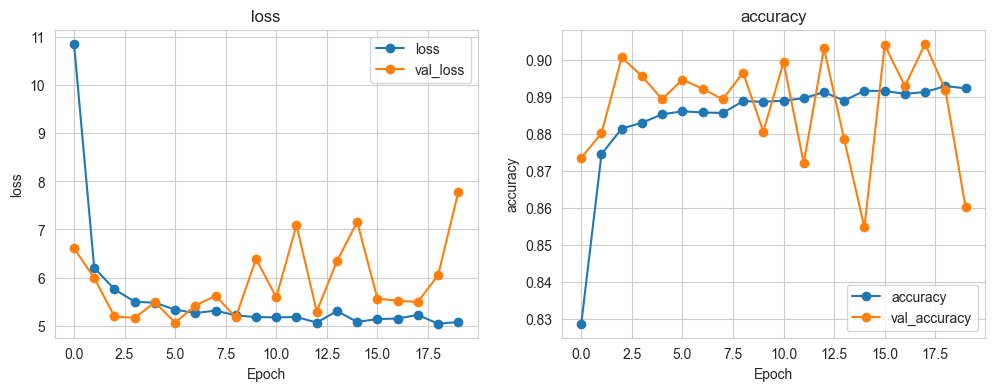

In [25]:
plot_metrics(naive_history)

In [33]:
model_deep = make_model ([128,128,10], ['Hidden1', 'Hidden2', 'Output'], ['relu', 'relu', 'softmax'], optimizer=optimizer)

model_deep.summary()

d:\TeachMe\DATA Sci\IT Högsk\GitHub\Machine_Learning-Mary-Kavalionak\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_deep.fit(X_train, y_train, epochs=20, validation_split=1/6, verbose = 1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7989 - loss: 4.9237 - val_accuracy: 0.9012 - val_loss: 0.4980
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9077 - loss: 0.4200 - val_accuracy: 0.9181 - val_loss: 0.3689
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2994 - val_accuracy: 0.8980 - val_loss: 0.4471
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9362 - loss: 0.2583 - val_accuracy: 0.9436 - val_loss: 0.2387
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9477 - loss: 0.2013 - val_accuracy: 0.9516 - val_loss: 0.2054
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9562 - loss: 0.1621 - val_accuracy: 0.9530 - val_loss: 0.1804
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9642 - loss: 0.1289 - val_accuracy: 0.9530 - val_loss: 0.1776
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9634 - loss: 0.1310 - 

In [28]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.index = range(len(deep_history))

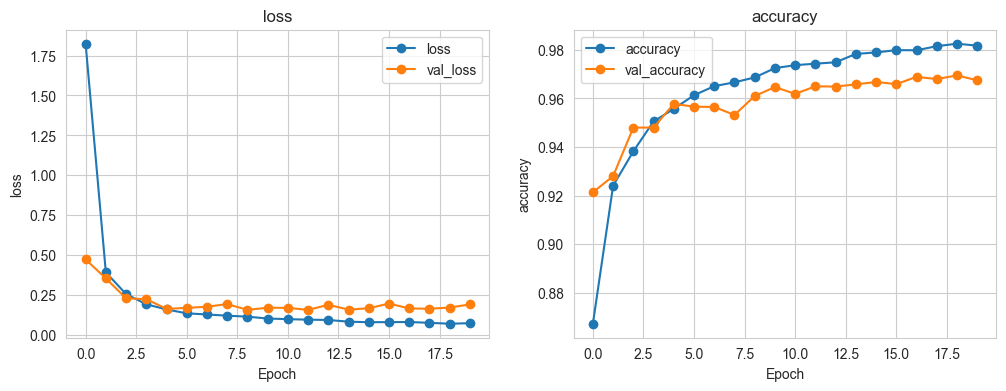

In [29]:
plot_metrics(deep_history)

In [35]:
model_deep.fit(X_train, y_train, epochs=4, validation_split=1/6, verbose = 1)

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9809 - loss: 0.0828 - val_accuracy: 0.9625 - val_loss: 0.1866
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0582 - val_accuracy: 0.9674 - val_loss: 0.1801
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0624 - val_accuracy: 0.9703 - val_loss: 0.1743
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0555 - val_accuracy: 0.9703 - val_loss: 0.2136


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.94      0.96       982
           5       0.95      0.96      0.95       892
           6       0.97      0.98      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.92      0.96      0.94       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



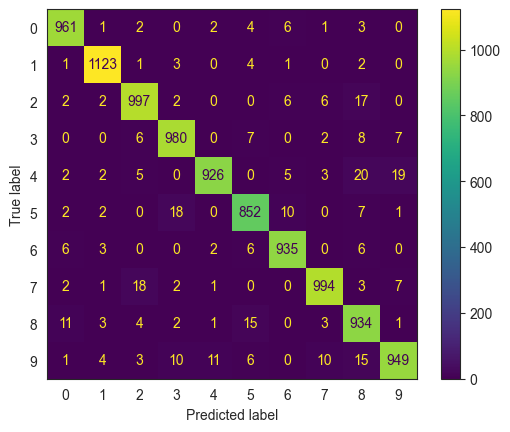

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

sns.set_style('white')
y_pred = model_deep.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

AttributeError: 'Figure' object has no attribute 'sublots_adjust'

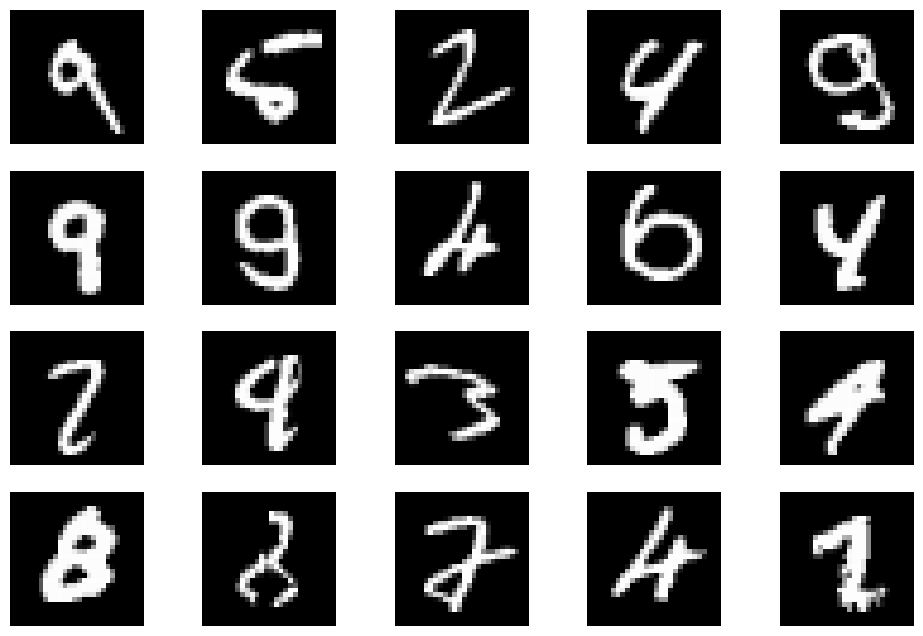

In [40]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_indices]

display_images(misclassified_samples, 4, 5, (12, 8))